<a href="https://colab.research.google.com/github/iyappan24/Applied-AI-Notebooks/blob/master/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AMAZON FINE FOOD REVIEWS : K NEAREST NEIGHBORS 

Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews

The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.<br>

Number of reviews: 568,454<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10 

Attribute Information:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. ProfileName
5. HelpfulnessNumerator - number of users who found the review helpful
6. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7. Score - rating between 1 and 5
8. Time - timestamp for the review
9. Summary - brief summary of the review
10. Text - text of the review


**DATA SET SPLITS ** 

1. AVG_WORD2VEC : 70K TRAIN,  30K TEST
2. TFIDF_WORD2VEC : 70K TRAIN ,  30K TEST
3. BOW : 60K TRAIN,  20K CV,  20K TEST
4. TFIDF : 60K TRAIN, 20K CV,  20K TEST


## IMPORTING THE LIBRARIES

In [22]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,recall_score,precision_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly as py
import plotly.graph_objs  as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from sklearn.decomposition import TruncatedSVD
import operator

### CONFIGURING PLOTLY


In [3]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


### LOADING THE DATA

### FEATURIZATION 1 : BAG OF WORDS

In [0]:
bow_train = pickle.load(open('/content/gdrive/My Drive/AppliedAI/Amazon Fine Food Reviews/train_bow.sav','rb'))
bow_cv = pickle.load(open('/content/gdrive/My Drive/AppliedAI/Amazon Fine Food Reviews/cv_bow.sav','rb'))
bow_test = pickle.load(open('/content/gdrive/My Drive/AppliedAI/Amazon Fine Food Reviews/test_bow.sav','rb'))
y_train = pickle.load(open('/content/gdrive/My Drive/AppliedAI/Amazon Fine Food Reviews/y_train.sav','rb'))
y_test = pickle.load(open('/content/gdrive/My Drive/AppliedAI/Amazon Fine Food Reviews/y_test.sav','rb'))
y_cv = pickle.load(open('/content/gdrive/My Drive/AppliedAI/Amazon Fine Food Reviews/y_cv.sav','rb'))
bow = pickle.load(open('/content/gdrive/My Drive/AppliedAI/Amazon Fine Food Reviews/BOW.sav','rb'))

** DEFINING ALPHA RANGES  FOR CROSS VALIDATION **

In [0]:
range_alpha = np.arange(0,4,0.15)

In [0]:
range_alpha=np.round(range_alpha,decimals = 1)

In [0]:
#creating dictionaries to score the corresponding values of the metrics
cv_a = {}
cv_r = {}
cv_p = {}
cv_f1 = {}
cv_Nr = {}
cv_Nf1= {}

 ** RUNNING THE LOOP ** 

In [68]:
#making the algorithm learn the prior probabilities from the training dataset
for i in range_alpha:
  mnb = MultinomialNB(alpha = i,fit_prior = True)
  mnb.fit(bow_train,y_train)
  print("Running for Alpha : " + str(i) + "\n")
  c_pred = mnb.predict(bow_cv)
  cv_a[i] = accuracy_score(y_cv,c_pred)
  cv_r[i] = recall_score(y_cv,c_pred,average='weighted')
  cv_p[i] = precision_score(y_cv,c_pred,average = 'weighted')
  cv_f1[i] = f1_score(y_cv,c_pred,average = 'weighted')
  cv_Nr[i] =recall_score(y_cv,c_pred,average='binary',pos_label=0) #getting the recall of the negative reviews label 
  cv_Nf1[i]=f1_score(y_cv,c_pred,average = 'binary',pos_label = 0) #getting the F1_score of the negative reviews label

Running for Alpha : 0.0

Running for Alpha : 0.2

Running for Alpha : 0.3

Running for Alpha : 0.4

Running for Alpha : 0.6

Running for Alpha : 0.8

Running for Alpha : 0.9

Running for Alpha : 1.0

Running for Alpha : 1.2

Running for Alpha : 1.3

Running for Alpha : 1.5

Running for Alpha : 1.6

Running for Alpha : 1.8

Running for Alpha : 2.0

Running for Alpha : 2.1

Running for Alpha : 2.2

Running for Alpha : 2.4

Running for Alpha : 2.6

Running for Alpha : 2.7

Running for Alpha : 2.8

Running for Alpha : 3.0

Running for Alpha : 3.2

Running for Alpha : 3.3

Running for Alpha : 3.4

Running for Alpha : 3.6

Running for Alpha : 3.8

Running for Alpha : 3.9



** ACCURACY  PLOT ** 

Text(0.5,1,'ACCURACY \n ')

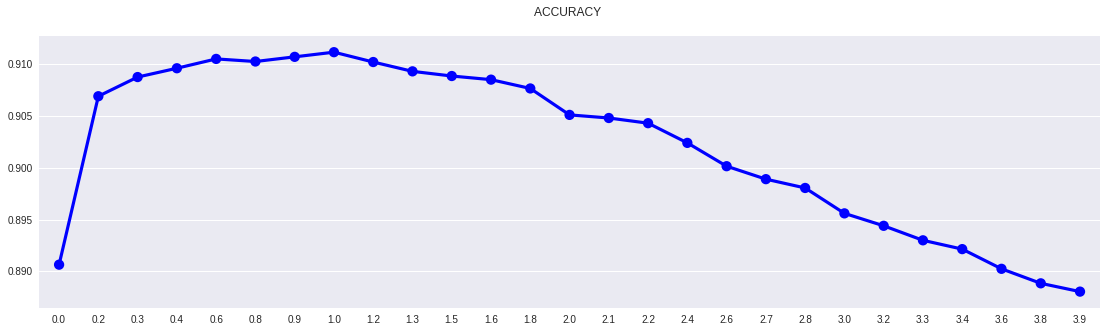

In [69]:
plt.figure(figsize = (19,5))
sns.pointplot(x = list(cv_a.keys()),y=list(cv_a.values()),color ='blue').set_title("ACCURACY \n ")

In [70]:
max(cv_a.items(), key=operator.itemgetter(1))

(1.0, 0.91115)

 ** Maximum accuracy is occuring at Alpha = 1.0  ** 

------
** WEIGHTED PRECISION PLOT ** 

Text(0.5,1,'WEIGHTED PRECISION PLOT \n ')

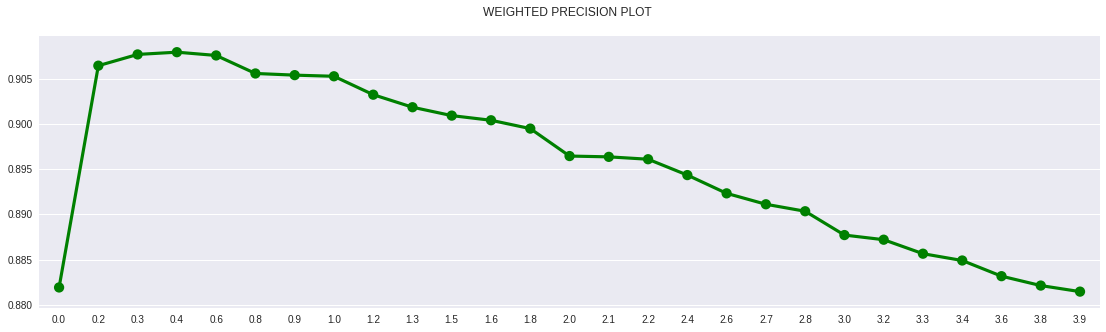

In [71]:
plt.figure(figsize = (19,5))
sns.pointplot(x = list(cv_p.keys()),y=list(cv_p.values()),color ='green').set_title("WEIGHTED PRECISION PLOT \n ")

In [72]:
max(cv_p.items(), key=operator.itemgetter(1))

(0.4, 0.9080007284772442)

The precision  is  dominated by the positive review class due to the fact that support of the negative class is very less. <br>
** Maximum Precision is at Alpha = 0.4 ** 

___
 ** WEIGHTED RECALL  PLOT ** 

Text(0.5,1,'WEIGHTED RECALL PLOT \n ')

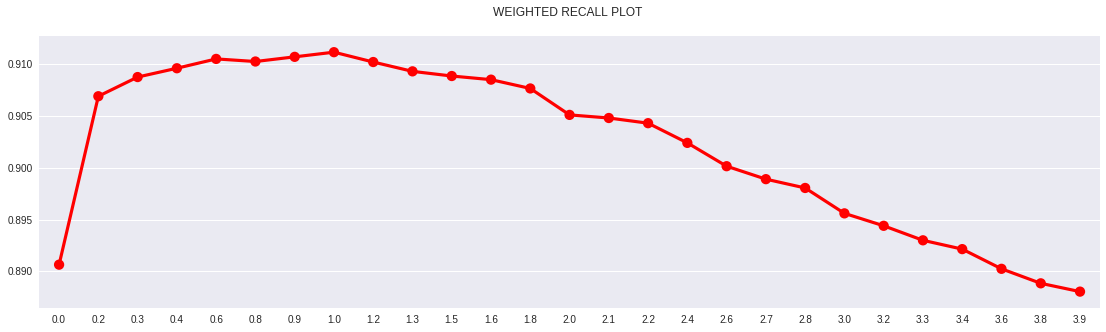

In [73]:
plt.figure(figsize = (19,5))
sns.pointplot(x = list(cv_r.keys()),y=list(cv_r.values()),color ='red').set_title("WEIGHTED RECALL PLOT \n ")

In [74]:
max(cv_r.items(), key=operator.itemgetter(1))

(1.0, 0.91115)

The Recall  is  dominated by the positive review class due to the fact that support of the negative class is very less. <br>
** Maximum Recal is at Alpha = 1.0 ** 

----
** WEIGHTED F1 SCORE  PLOT** 

Text(0.5,1,'WEIGHTED F1 SCORE PLOT \n ')

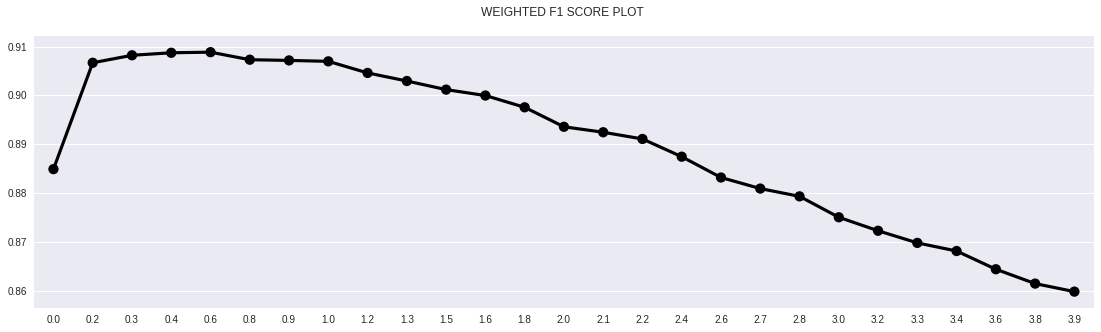

In [75]:
plt.figure(figsize = (19,5))
sns.pointplot(x = list(cv_f1.keys()),y=list(cv_f1.values()),color ='black').set_title("WEIGHTED F1 SCORE PLOT \n ")

In [76]:
max(cv_f1.items(), key=operator.itemgetter(1))

(0.6, 0.9088669043433493)

** MAXIMUM F1 SCORE AT ALPHA  = 0.6 ** 

______

** RECALL OF NEGATIVE REVIEWS ** 

Text(0.5,1,'RECALL OF NEGATIVE REVIEWS\n ')

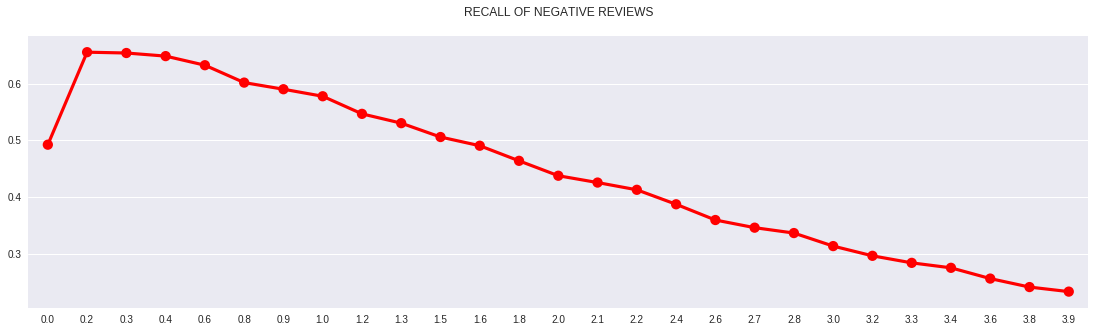

In [79]:
plt.figure(figsize = (19,5))
sns.pointplot(x = list(cv_Nr.keys()),y=list(cv_Nr.values()),color ='red').set_title("RECALL OF NEGATIVE REVIEWS\n ")

In [78]:
max(cv_Nr.items(), key=operator.itemgetter(1))

(0.2, 0.6552353155782561)

 ** MAXIMUM RECALL FOR NEGATIVE REVIEWS OCCURS AT ALPHA = 0.2 **

-----
 ** F1 SCORE OF NEGATIVE REVIEWS **

Text(0.5,1,'F1 SCORE OF NEGATIVE REVIEWS\n ')

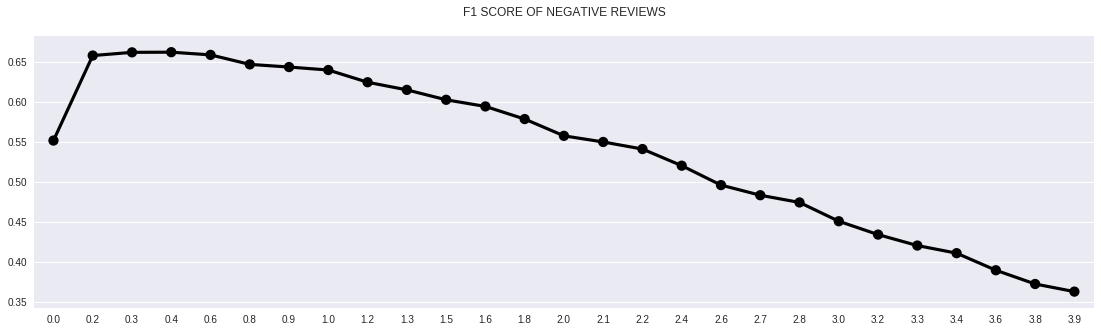

In [80]:
plt.figure(figsize = (19,5))
sns.pointplot(x = list(cv_Nf1.keys()),y=list(cv_Nf1.values()),color ='black').set_title("F1 SCORE OF NEGATIVE REVIEWS\n ")

In [81]:
max(cv_Nf1.items(), key=operator.itemgetter(1))

(0.4, 0.6628123834390153)

** MAXIMUM F1 SCORE OF NEGATIVE REVIEWS OCCUR AT ALPHA = 0.4 ** 

--------

 ** OBJECTIVE ** 
 
 1. Have model whose ability to is high in predicting the negative reviews in the presence of class imbalnce problem
 
 2.  Recall of the Minority class must be high i.e Negative Reviews
 
 3. Have a  decent tradeoff between the Recall of the Negative Reviews and overall accuracy of the algorithm to choose the best Alpha because the Priors are already impacted by the imbalance of class present in the dataset
 
 ------
 
| ALPHA | ACCURACY   | RECALL : NEGATIVE REVIEWS |
|------|------|-----|
|   0.2  | 90.69 | 65.52|
|   0.4  | 90.69| 64.83|
|   0.6  | 91.05 | 63.22 |
|   1.0 | 91.15 | 57.75 |

-------

** Observations ** 
1. When Alpha is at 0.2 there is highest Recall of negative reviews with a good accuracy of 90.69
2. When Alpha is at 0.6 there is 2.3% reduction in the recall of the negative reviews and  0.36 increase in the accuracy of the algorithm. 
3. In order to choose the righ alpha the test errors and train errors must be examined and the difference must be noted to figure out which is the best suitable alpha. Look at the overfiiting and underfiiting phenomenon.


** APLHA  = 0.2 ** 

In [104]:
mnb = MultinomialNB(alpha = 0.2, fit_prior=True)
mnb.fit(bow_train,y_train)
pred = mnb.predict(bow_test)
t_pred = mnb.predict(bow_train)
print("Test accuracy " + str(accuracy_score(y_test,pred)*100))
print("\n")
print("Test_error : " + str((1-accuracy_score(y_test,pred))*100))
print("\n")
print("Train error : " + str((1-accuracy_score(y_train,t_pred))*100))
print("\n")
print(classification_report(pred,y_test))

Test accuracy 90.35499999999999


Test_error : 9.645000000000003


Train error : 6.9200000000000035


             precision    recall  f1-score   support

          0       0.66      0.63      0.65      2791
          1       0.94      0.95      0.94     17209

avg / total       0.90      0.90      0.90     20000



In [102]:
mnb = MultinomialNB(alpha = 0.6, fit_prior=True)
mnb.fit(bow_train,y_train)
pred = mnb.predict(bow_test)
t_pred = mnb.predict(bow_train)
print("Test accuracy " + str(accuracy_score(y_test,pred)*100))
print("\n")
print("Test_error : " + str((1-accuracy_score(y_test,pred))*100))
print("\n")
print("Train error : " + str((1-accuracy_score(y_train,t_pred))*100))
print("\n")
print(classification_report(pred,y_test))

Test accuracy 90.635


Test_error : 9.365000000000002


Train error : 7.028333333333336


             precision    recall  f1-score   support

          0       0.63      0.66      0.64      2549
          1       0.95      0.94      0.95     17451

avg / total       0.91      0.91      0.91     20000



------

** OBSERVATIONS **

| ALPHA | ACCURACY   | RECALL : NEGATIVE REVIEWS |TRAIN ERROR | TEST ERROR | DIFFERENCE|
|------|------|-----|-----|----|----|
|   0.2  | 90.35 | 63 |6.92|9.645|2.75|
|   0.26 | 90.635 | 66 |7.02|9.365|2.345|

------
** ALPHA = 0.6 ** has the upper edge over 0.2 with a 3% increase in the test recall and and 0.6% increase in the overall accuracy even though both are not overfitting  very much   <br>

**CONFUSION MATRIX**

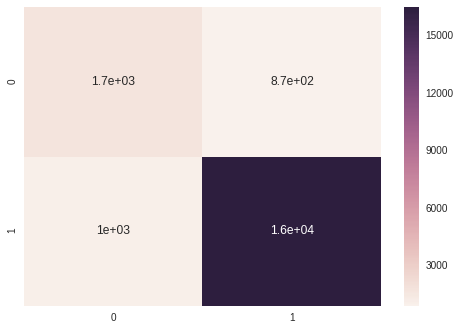

In [108]:
mnb = MultinomialNB(alpha = 0.6, fit_prior=True)
mnb.fit(bow_train,y_train)
pred = mnb.predict(bow_test)
sns.heatmap(confusion_matrix(pred,y_test),annot=True)

### FEATURE IMPORTANCE

In [0]:
features = bow.get_feature_names()

** NEGATIVE REVIEWS**

In [0]:
#getting top 100 words which have more likelihood given the class is negative reviews or 0
N_r_features = dict(zip(features,mnb.feature_log_prob_[0]))

nt_50 = sorted(N_r_features.items(), key=operator.itemgetter(1),reverse= True)[:50]
n_50 = {}

for i in nt_50:
  n_50[i[0]] = i[1]

Text(0.5,1,'Log_Probabilities_of WORDS')

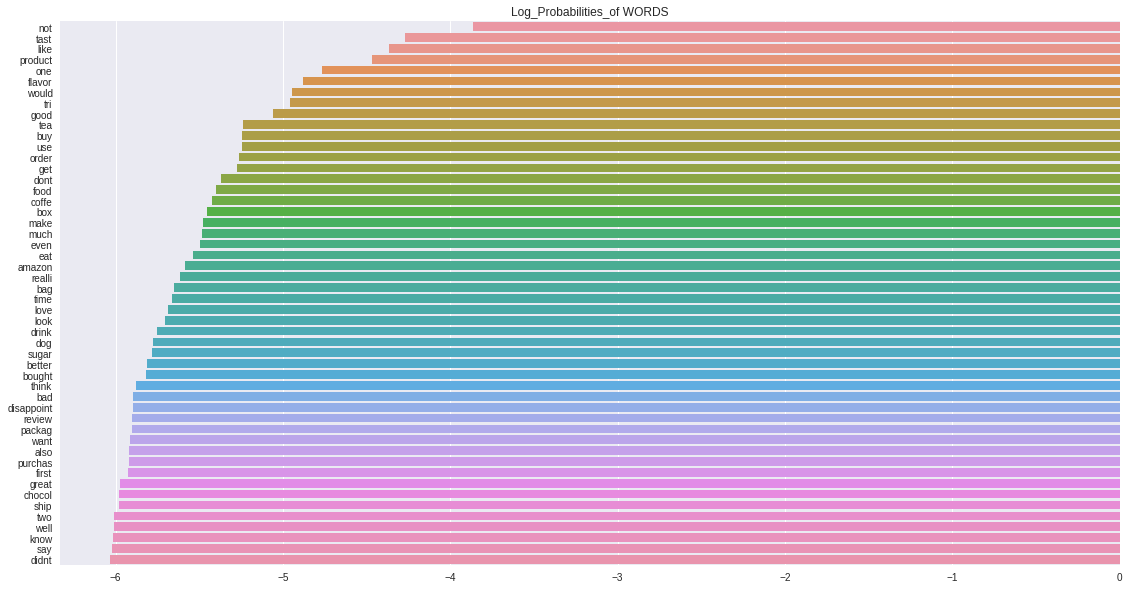

In [142]:
plt.figure(figsize = (19,10))
sns.barplot(x=list(n_50.values()),y = list(n_50.keys())).set_title("Log_Probabilities_of WORDS")

In [0]:
#getting top 100 words which have more likelihood given the class is negative reviews or 0
P_r_features = dict(zip(features,mnb.feature_log_prob_[1]))

pt_50 = sorted(P_r_features.items(), key=operator.itemgetter(1),reverse= True)[:50]
p_50 = {}

for i in pt_50:
  p_50[i[0]] = i[1]

** POSITIVE REVIEWS **

Text(0.5,1,'Log_Probabilities_of WORDS')

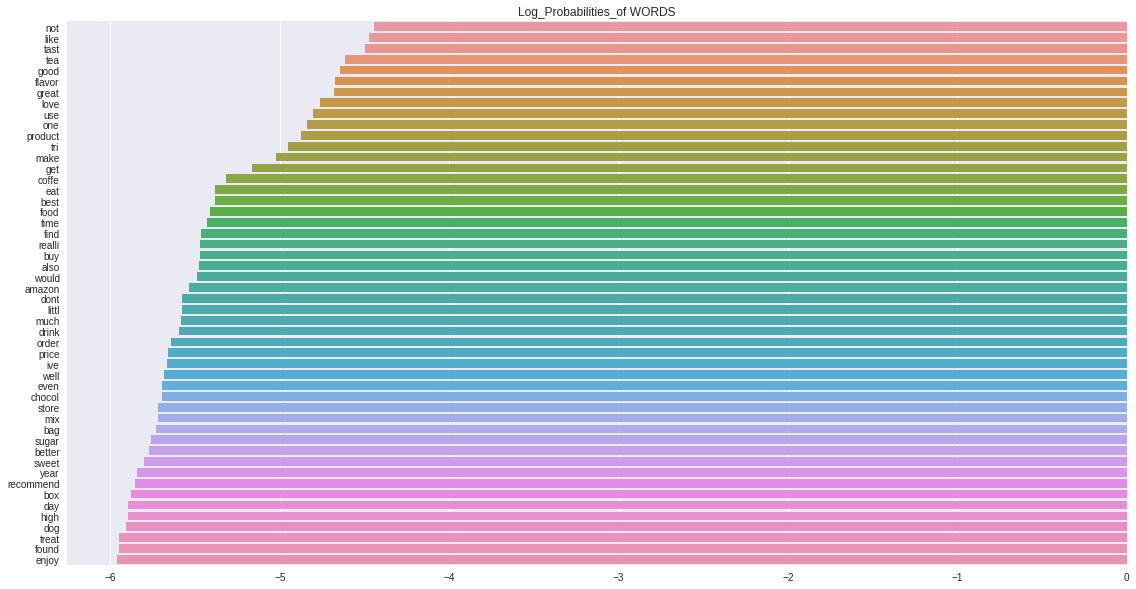

In [149]:
plt.figure(figsize = (19,10))
sns.barplot(x=list(p_50.values()),y = list(p_50.keys())).set_title("Log_Probabilities_of WORDS")

------


<br>

## FEATURIZATION 2 : TF IDF 

### Loading the data

In [0]:
tf_idf_train = pickle.load(open('/content/gdrive/My Drive/AppliedAI/Amazon Fine Food Reviews/train_tfidf.sav','rb'))
tf_idf_test = pickle.load(open('/content/gdrive/My Drive/AppliedAI/Amazon Fine Food Reviews/test_tfidf.sav','rb'))
tf_idf_cv = pickle.load(open('/content/gdrive/My Drive/AppliedAI/Amazon Fine Food Reviews/cv_tfidf.sav','rb'))
tf_idf = pickle.load(open('/content/gdrive/My Drive/AppliedAI/Amazon Fine Food Reviews/tfidf.sav','rb'))

** DEFINING ALPHA RANGES ** 

In [0]:
range_alpha = np.arange(0,4,0.15)
range_alpha=np.round(range_alpha,decimals = 1)

In [0]:
#creating dictionaries to score the corresponding values of the metrics
cv_a = {}
cv_r = {}
cv_p = {}
cv_f1 = {}
cv_Nr = {}
cv_Nf1= {}
cv_Np = {}

### RUNNING THE LOOP

In [173]:
for i in range_alpha:
  mnb = MultinomialNB(alpha = i,fit_prior = True)
  mnb.fit(tf_idf_train,y_train)
  print("Running for Alpha : " + str(i) + "\n")
  c_pred = mnb.predict(tf_idf_cv)
  cv_a[i] = accuracy_score(y_cv,c_pred)
  cv_r[i] = recall_score(y_cv,c_pred,average='weighted')
  cv_p[i] = precision_score(y_cv,c_pred,average = 'weighted')
  cv_f1[i] = f1_score(y_cv,c_pred,average = 'weighted')
  cv_Nr[i] =recall_score(y_cv,c_pred,average='binary',pos_label=0) #getting the recall of the negative reviews label 
  cv_Nf1[i]=f1_score(y_cv,c_pred,average = 'binary',pos_label = 0) #getting the F1_score of the negative reviews label
  cv_Np[i]=precision_score(y_cv,c_pred,average = 'binary',pos_label = 0)#getting the precision of the negative reviews label

Running for Alpha : 0.0

Running for Alpha : 0.2

Running for Alpha : 0.3

Running for Alpha : 0.4

Running for Alpha : 0.6

Running for Alpha : 0.8

Running for Alpha : 0.9

Running for Alpha : 1.0

Running for Alpha : 1.2

Running for Alpha : 1.3

Running for Alpha : 1.5

Running for Alpha : 1.6

Running for Alpha : 1.8

Running for Alpha : 2.0

Running for Alpha : 2.1

Running for Alpha : 2.2

Running for Alpha : 2.4

Running for Alpha : 2.6

Running for Alpha : 2.7

Running for Alpha : 2.8

Running for Alpha : 3.0

Running for Alpha : 3.2

Running for Alpha : 3.3

Running for Alpha : 3.4

Running for Alpha : 3.6

Running for Alpha : 3.8

Running for Alpha : 3.9



** ACCURACY PLOT ** 

Text(0.5,1,'ACCURACY \n ')

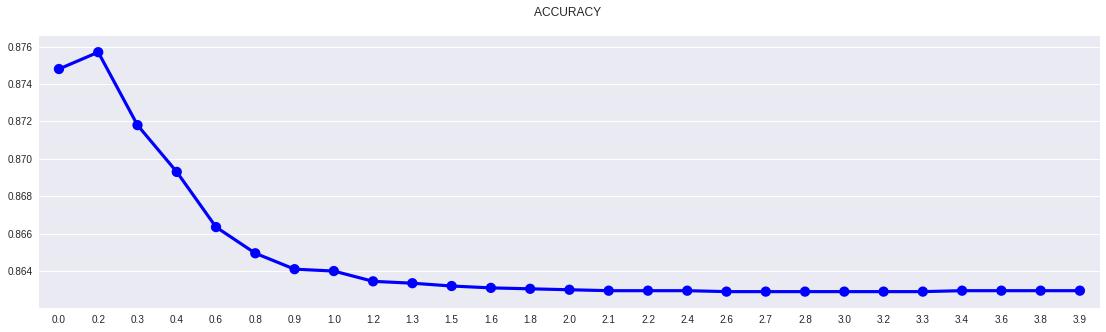

In [154]:
plt.figure(figsize = (19,5))
sns.pointplot(x = list(cv_a.keys()),y=list(cv_a.values()),color ='blue').set_title("ACCURACY \n ")

In [155]:
max(cv_a.items(), key=operator.itemgetter(1))

(0.2, 0.8757)

 ** MAXIMUM ACCURACY IS AT ALPHA = 0.2 ** 

------
** WEIGHTED PRECISION PLOT ** 


Text(0.5,1,'WEIGHTED PRECISION PLOT \n ')

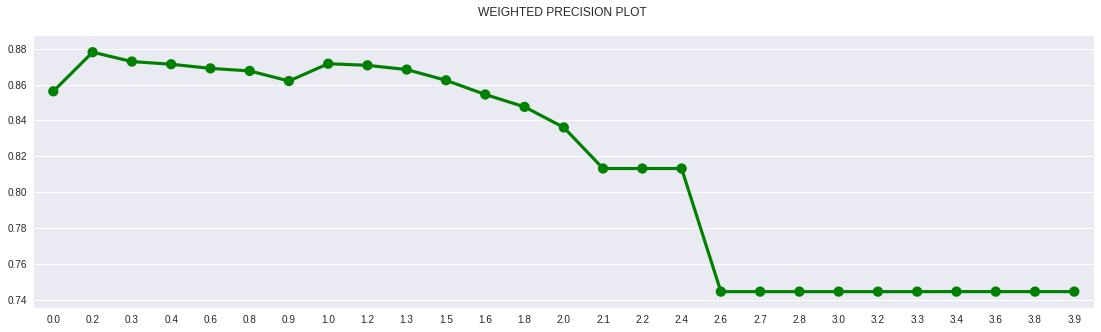

In [156]:
plt.figure(figsize = (19,5))
sns.pointplot(x = list(cv_p.keys()),y=list(cv_p.values()),color ='green').set_title("WEIGHTED PRECISION PLOT \n ")

In [157]:
max(cv_p.items(), key=operator.itemgetter(1))

(0.2, 0.878039334462089)

** Maximum Precision is at Alpha = 0.2 ** 

___
 ** WEIGHTED RECALL  PLOT ** 

Text(0.5,1,'WEIGHTED RECALL PLOT \n ')

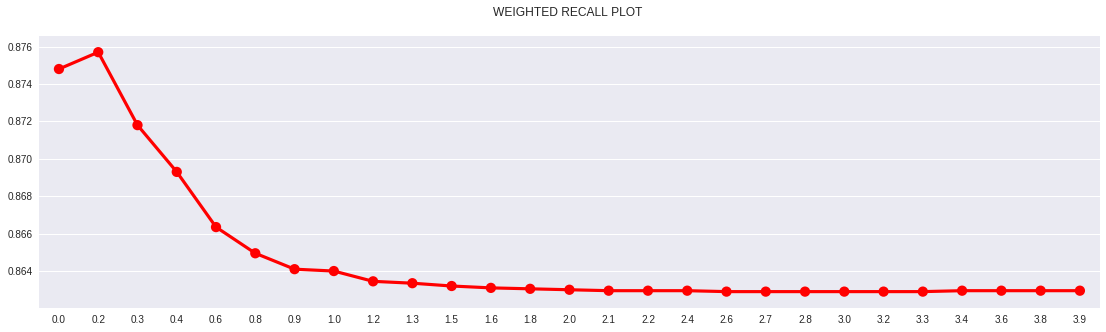

In [158]:
plt.figure(figsize = (19,5))
sns.pointplot(x = list(cv_r.keys()),y=list(cv_r.values()),color ='red').set_title("WEIGHTED RECALL PLOT \n ")

In [159]:
max(cv_r.items(), key=operator.itemgetter(1))

(0.2, 0.8757)

** Maximum RECALL is at Alpha = 0.2 ** 

----
** WEIGHTED F1 SCORE  PLOT** 

Text(0.5,1,'WEIGHTED F1 SCORE PLOT \n ')

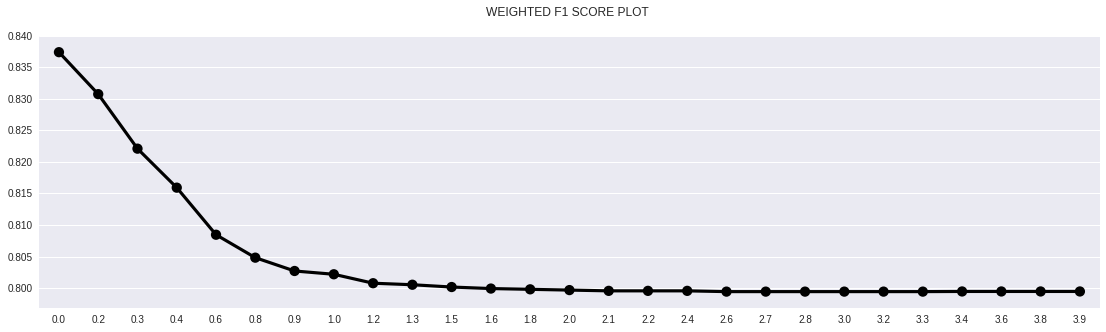

In [160]:
plt.figure(figsize = (19,5))
sns.pointplot(x = list(cv_f1.keys()),y=list(cv_f1.values()),color ='black').set_title("WEIGHTED F1 SCORE PLOT \n ")

In [161]:
max(cv_f1.items(), key=operator.itemgetter(1))

(0.0, 0.8373686613531565)

** Maximum weighted F1 Score is at Alpha = 0. But we cannot take into consideration due to the fact that the algorithm will overfit during training **

______

** RECALL OF NEGATIVE REVIEWS ** 

Text(0.5,1,'RECALL OF NEGATIVE REVIEWS\n ')

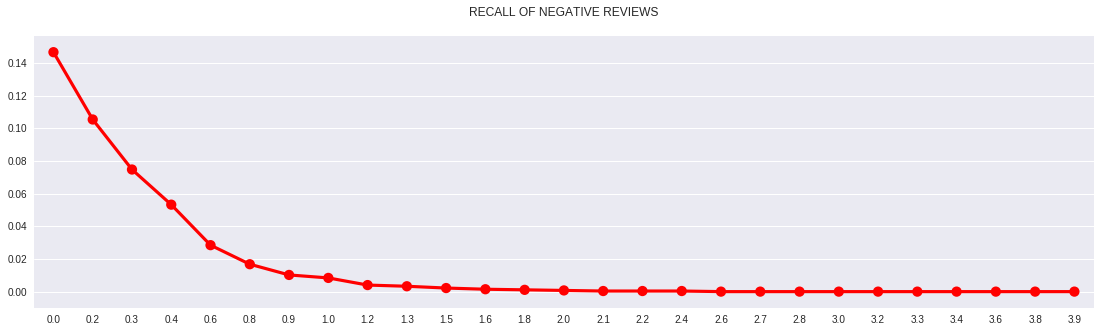

In [162]:
plt.figure(figsize = (19,5))
sns.pointplot(x = list(cv_Nr.keys()),y=list(cv_Nr.values()),color ='red').set_title("RECALL OF NEGATIVE REVIEWS\n ")

 ** MAXIMUM RECALL FOR NEGATIVE REVIEWS OCCURS AT ALPHA = 0.0 **

------
** PRECISION PLOT FOR NEGATIVE REVIEWS**

Text(0.5,1,'PRECISION SCORE OF NEGATIVE REVIEWS\n ')

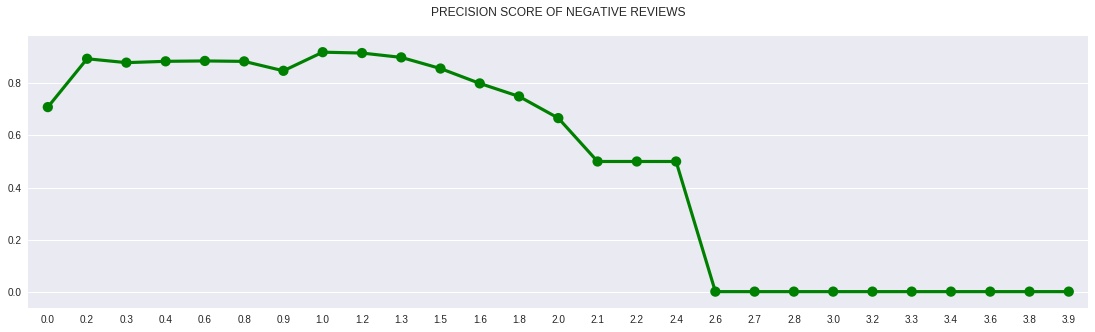

In [174]:
plt.figure(figsize = (19,5))
sns.pointplot(x = list(cv_Np.keys()),y=list(cv_Np.values()),color ='green').set_title("PRECISION SCORE OF NEGATIVE REVIEWS\n ")

** PRECISION IS MAXIMUM A 0.2 ** 

Text(0.5,1,'F1 SCORE OF NEGATIVE REVIEWS\n ')

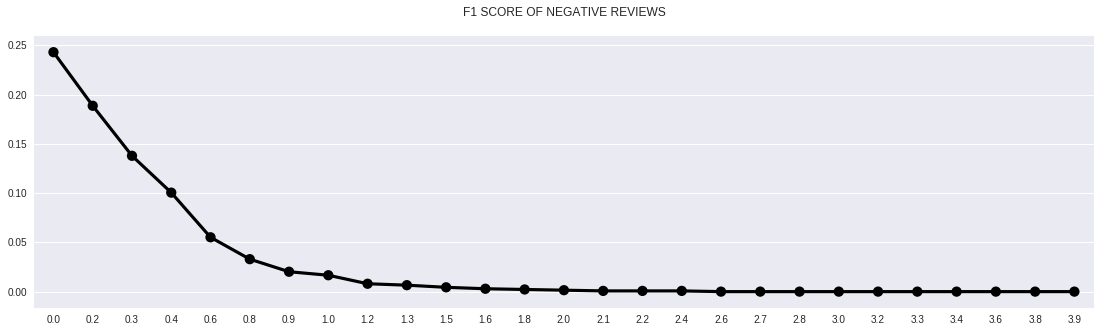

In [163]:
plt.figure(figsize = (19,5))
sns.pointplot(x = list(cv_Nf1.keys()),y=list(cv_Nf1.values()),color ='black').set_title("F1 SCORE OF NEGATIVE REVIEWS\n ")

 ** MAXIMUM F1 SCORE FOR NEGATIVE REVIEWS OCCURS AT ALPHA = 0.0 **

----------

** OBSERVATIONS ** 

1. In the TF-IDF representation at alpha = 0.2 there is reasonable recall for the negative reviews.
But the recall for negative reviews are high at alpha  = 0.  There are high chances of over fitting when alpha = 0.0. 
2. We have to examine the train and test errors to determine the alpha. (0.0 or 0.2)
3. TF IDF method of information retrieval does not give enough information for calculation of the the likelihoods for Naive Bayes algorithm.
4. Bag of words is a better reprsentation than TF_IDF when the machine learning model is Naive Bayes.


** ALPHA = 0.2 ** 

In [181]:
mnb = MultinomialNB(alpha = 0.2, fit_prior=True)
mnb.fit(tf_idf_train,y_train)
pred = mnb.predict(tf_idf_test)
t_pred = mnb.predict(tf_idf_train)
print("Test accuracy " + str(accuracy_score(y_test,pred)*100))
print("\n")
print("Test_error : " + str((1-accuracy_score(y_test,pred))*100))
print("\n")
print("Train error : " + str((1-accuracy_score(y_train,t_pred))*100))
print("\n")
print(classification_report(pred,y_test))

Test accuracy 87.785


Test_error : 12.214999999999998


Train error : 9.188333333333333


             precision    recall  f1-score   support

          0       0.10      0.87      0.18       309
          1       1.00      0.88      0.93     19691

avg / total       0.98      0.88      0.92     20000



In [168]:
confusion_matrix(y_test,pred)

array([[  270,  2404],
       [   39, 17287]])

** ALPHA = 0.0**

In [169]:
mnb = MultinomialNB(alpha = 0.0, fit_prior=True)
mnb.fit(tf_idf_train,y_train)
pred = mnb.predict(tf_idf_test)
t_pred = mnb.predict(tf_idf_train)
print("Test accuracy " + str(accuracy_score(y_test,pred)*100))
print("\n")
print("Test_error : " + str((1-accuracy_score(y_test,pred))*100))
print("\n")
print("Train error : " + str((1-accuracy_score(y_train,t_pred))*100))
print("\n")
print(classification_report(pred,y_test))

Test accuracy 87.835


Test_error : 12.165000000000003


Train error : 6.833333333333336


             precision    recall  f1-score   support

          0       0.15      0.72      0.25       555
          1       0.99      0.88      0.93     19445

avg / total       0.97      0.88      0.91     20000



In [170]:
confusion_matrix(y_test,pred)

array([[  398,  2276],
       [  157, 17169]])

** OBSERVATIONS **

| ALPHA | ACCURACY   | RECALL : NEGATIVE REVIEWS |TRAIN ERROR | TEST ERROR | DIFFERENCE|
|------|------|-----|-----|----|----|
|   0.2  | 87.785| 87 |9.188|12.214|3 |
|   0.0 | 87.835 | 72 |6.833|12.165|5.332|

------
** ALPHA = 0.2 ** has the upper edge over 0. 0 with a 2.3% higher difference  in the test and  the train errors  even though both models are highly biased towards the postive class <br>

**CONFUSION MATRIX**

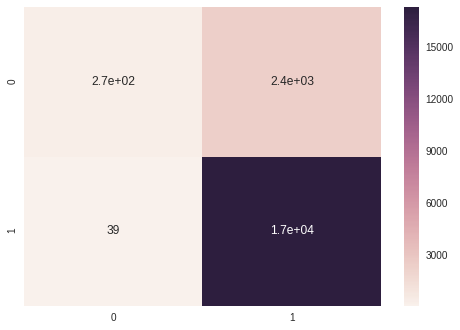

In [189]:
mnb = MultinomialNB(alpha = 0.2, fit_prior=True)
mnb.fit(tf_idf_train,y_train)
pred = mnb.predict(tf_idf_test)
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

-----

### FEATURE IMPORTANCE 

In [0]:
features = tf_idf.get_feature_names()

** NEGATIVE REVIEWS ** 

In [0]:
#getting top 100 words which have more likelihood given the class is negative reviews or 0
N_r_features = dict(zip(features,mnb.feature_log_prob_[0]))

nt_50 = sorted(N_r_features.items(), key=operator.itemgetter(1),reverse= True)[:50]
n_50 = {}

for i in nt_50:
  n_50[i[0]] = i[1]

Text(0.5,1,'Log_Probabilities_of WORDS')

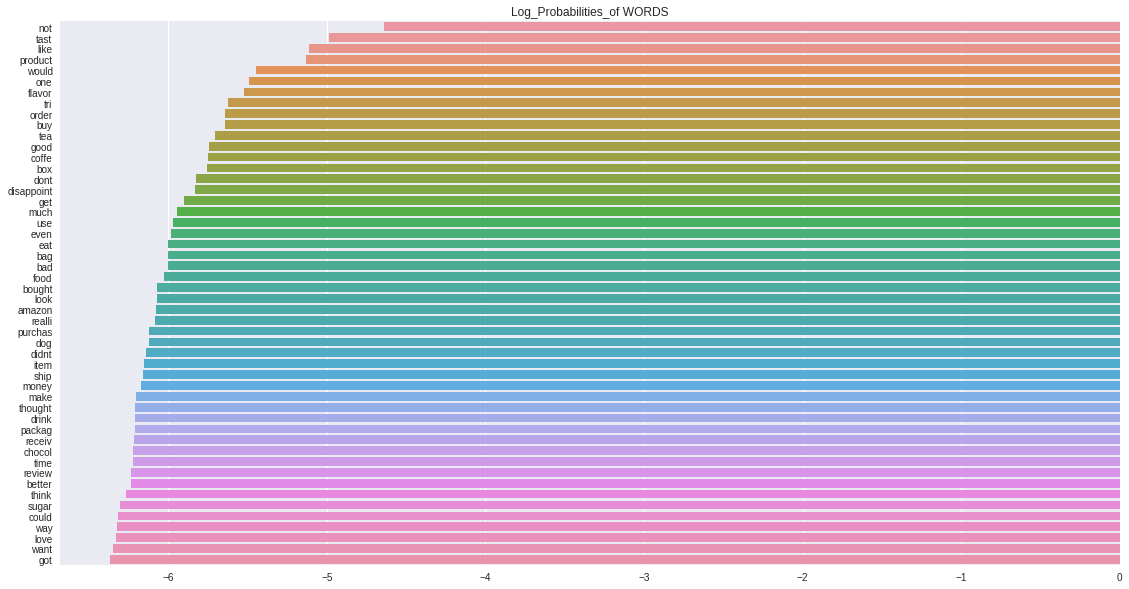

In [186]:
plt.figure(figsize = (19,10))
sns.barplot(x=list(n_50.values()),y = list(n_50.keys())).set_title("Log_Probabilities_of WORDS")

** POSITIVE REVIEWS ** 

In [0]:
#getting top 100 words which have more likelihood given the class is negative reviews or 0
P_r_features = dict(zip(features,mnb.feature_log_prob_[1]))

pt_50 = sorted(P_r_features.items(), key=operator.itemgetter(1),reverse= True)[:50]
p_50 = {}

for i in pt_50:
  p_50[i[0]] = i[1]

Text(0.5,1,'Log_Probabilities_of WORDS')

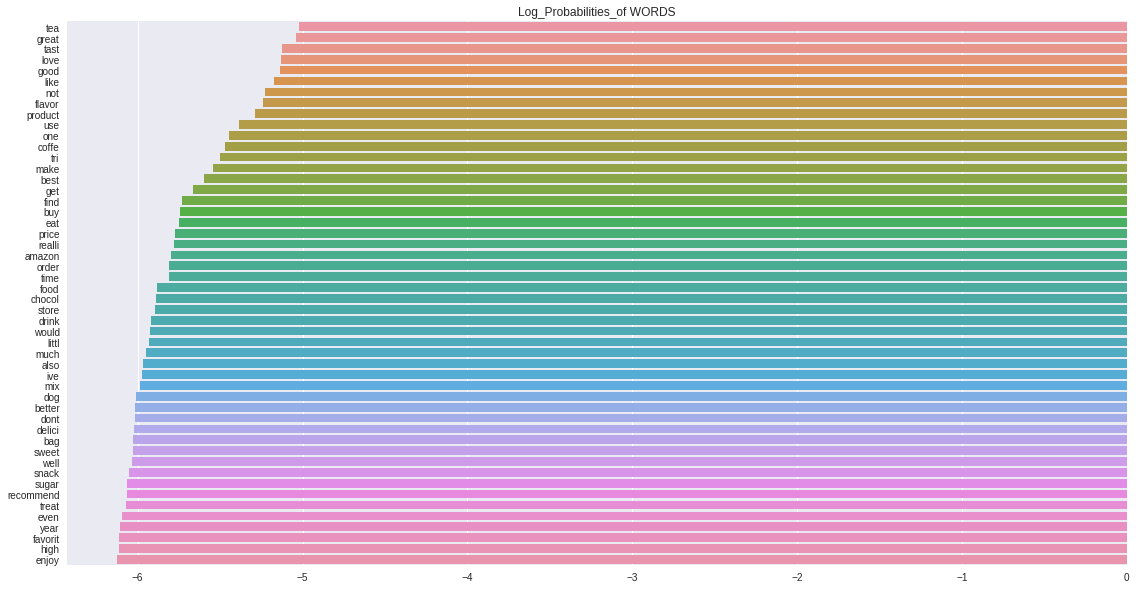

In [188]:
plt.figure(figsize = (19,10))
sns.barplot(x=list(p_50.values()),y = list(p_50.keys())).set_title("Log_Probabilities_of WORDS")